## Makes plots for theory paper

### This is the simplest possible modern MLP, 3 layers trained on MNIST

- First train the models. See pytorch_MLP_experiments.ipynb or keras_MLP_experiments.ipynb

Note: To apply the theory in this way, it is necessary to train the all models  for as long / to as high of accuracy as possible

In [4]:
# If you are running this NB in google colab then execute this cell

from google.colab import drive
drive.mount('/drive')
results_dir = '/drive/MyDrive/setol_paper'

!ls $results_dir

In [8]:
# If you are running this NB locally then set your results directory and execute this cell

results_dir = "../pytorch/saved_models/SETOL"
!ls $results_dir

MNIST  OLD_FASHION  OLD_MNIST  TEST


In [10]:
import os
os.chdir("../pytorch")

## Model Quality plots: Batch Size search

Models were trained with 6 batch sizes, ranging from 1 to 32. In general, test error decreases as batch size decreases, down to a certain point, after which it increases again. In this case, that point was a batch size of 2. The train and test accuracy are shown in the first plot in the left-most position, as a function of batch size. Error bars show one standard deviation.

Notice however, that the error begins to rise when $\alpha$ fell below $2.0$ in the FC1 layer. This is shown in the middle plot in the first row. The second row shows the $\alpha$ values for the FC2 layer. These also decrease towards $2.0$ as batch size decreases. At the final batch size of 1, the error bars are much wider as well.

The third column shows the $\hat{\alpha}$ metric, which is called `alpha_weighted` in `weightwatcher`. As with $\alpha$, $\hat{\alpha}$ steadily decreases along with test error, but notice that as batch size reaches 1, $\hat{\alpha}$ increases significantly. In the FC1 layer, test error is on the same curve as teh other points, while in FC2 it is larger than they are, and has drastically larger error bars, reflecting the distuptive effect of the overly small batch size.

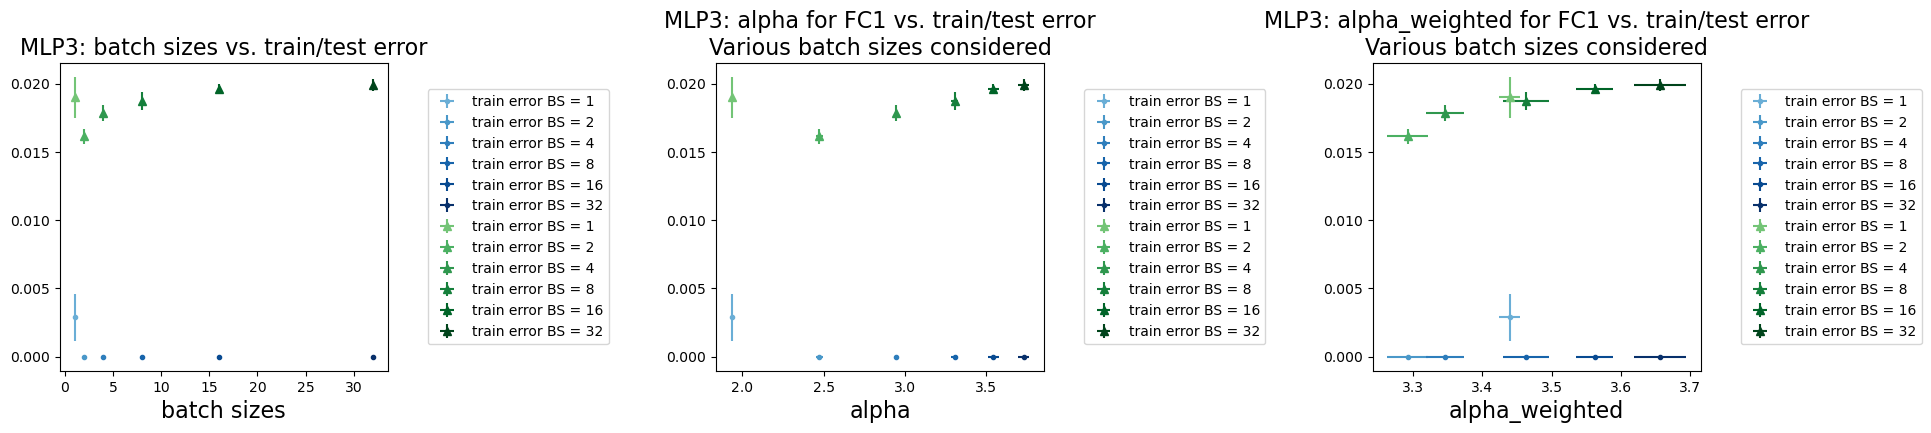

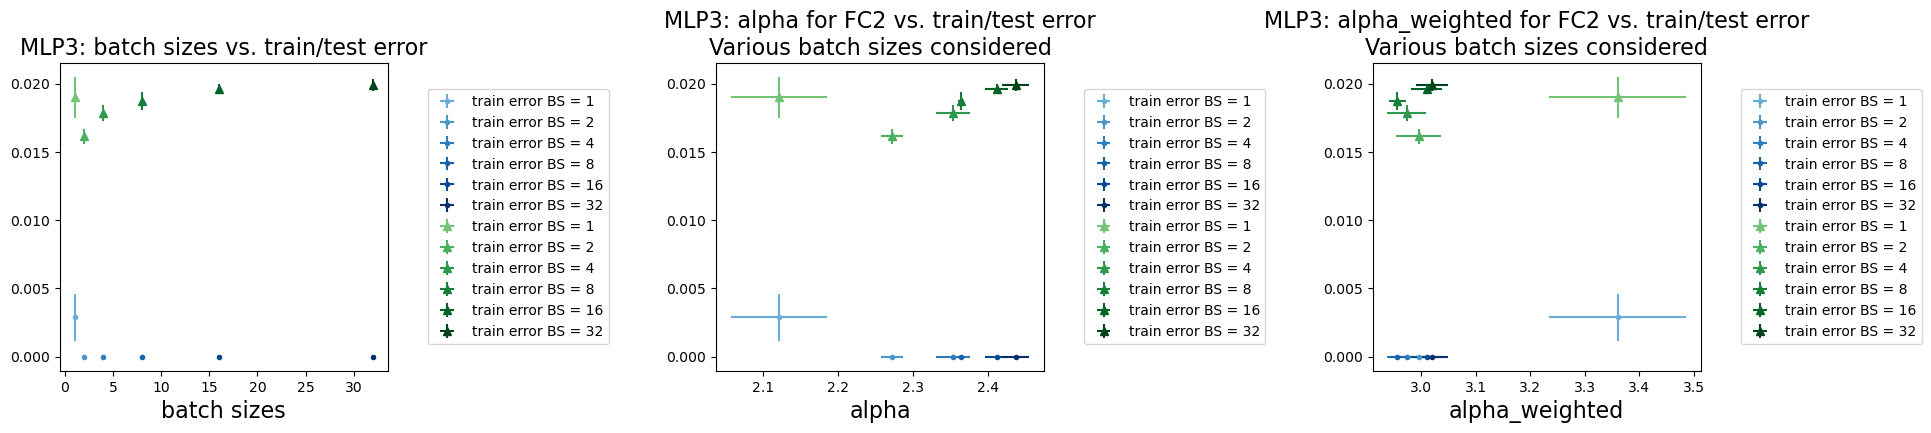

In [20]:
from plot_utils import plot_by_scales

DS = "MNIST"
OPT = "SGD"
WW_metrics = ["alpha", "alpha_weighted"]
search_param = "BS"

plot_by_scales(DS, OPT, "all", range(6), range(5), WW_metrics, trained_layer = 0, search_param=search_param)
plot_by_scales(DS, OPT, "all", range(6), range(5), WW_metrics, trained_layer = 1, search_param=search_param)

## Model Quality plots: Learning Rate search

There is a well known inverse relation between learning rate and batch size -- a small batch size is effectively the equivalent of a correspondingly larger learning rate. We can repeat the same experiment by using a constant batch size of 32, and instead increasing the learning rate by the same increments, from $1\times$, $2\times$, ... up to $32\times$. Here we see the same behaviors as before, except that the colors are reversed.

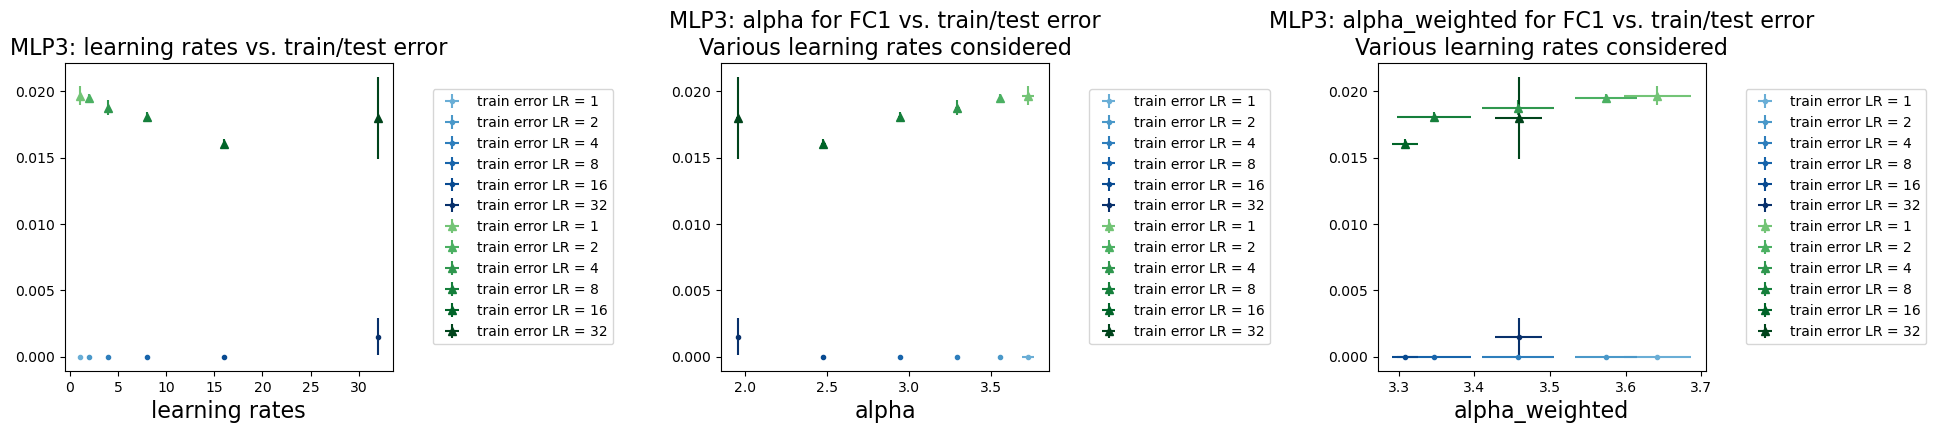

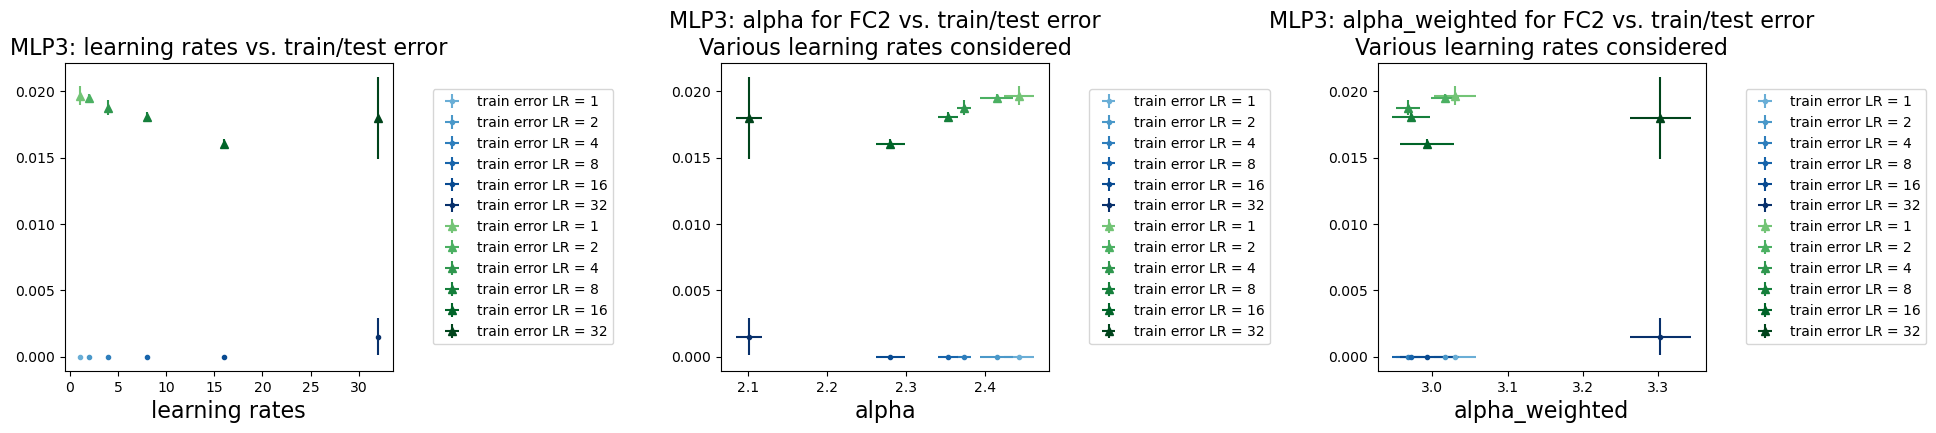

In [19]:
from plot_utils import plot_by_scales

DS = "MNIST"
OPT = "SGD"
WW_metrics = ["alpha", "alpha_weighted"]
search_param = "LR"

plot_by_scales(DS, OPT, "all", range(6), range(5), WW_metrics, trained_layer = 0, search_param=search_param)
plot_by_scales(DS, OPT, "all", range(6), range(5), WW_metrics, trained_layer = 1, search_param=search_param)